In [8]:
import matplotlib.pyplot as plt
import numpy as np
from heapq import heappush, heappop
import matplotlib.patches as mpatches

# --------------------------
# A* search algorithm
def astar(maze, start, goal, heuristic):
    """
    maze: 2D list (0=free,1=wall)
    start, goal: (row,col)
    heuristic: function(current, goal) -> float
    """
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heappush(open_set, (0 + heuristic(start, goal), 0, start, [start]))
    visited = set()
    
    while open_set:
        f, g, current, path = heappop(open_set)
        if current == goal:
            return path
        if current in visited:
            continue
        visited.add(current)
        
        r, c = current
        for dr, dc in [(-1,0),(1,0),(0,-1),(0,1)]:
            nr, nc = r + dr, c + dc
            if 0 <= nr < rows and 0 <= nc < cols and maze[nr][nc] == 0:
                if (nr, nc) not in visited:
                    new_g = g + 1
                    new_f = new_g + heuristic((nr,nc), goal)
                    heappush(open_set, (new_f, new_g, (nr,nc), path + [(nr,nc)]))
    return None

# --------------------------
# Maze visualization
def visualize_maze(maze, path=None, start=None, goal=None):
    rows, cols = len(maze), len(maze[0])
    grid = np.zeros((rows, cols, 3))
    for r in range(rows):
        for c in range(cols):
            grid[r,c] = [0,0,0] if maze[r][c]==1 else [1,1,1]
    if path:
        for r,c in path:
            if (r,c) != start and (r,c) != goal:
                grid[r,c] = [0,0,1]   # blue path
    if start: grid[start] = [0,1,0]  # green start
    if goal:  grid[goal] = [1,0,0]   # red goal
    plt.imshow(grid)
    plt.axis('off')
    legend_elements = [
        mpatches.Patch(color='#4d4d4d', label='Wall'),
        mpatches.Patch(color='#e0e0e0', label='Free space'),
        mpatches.Patch(color='#4682B4', label='Path'),
        mpatches.Patch(color='#006400', label='Start'),
        mpatches.Patch(color='#D50032', label='Goal')
    ]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 1))
    
    plt.show()

def manhattan_heuristic(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Cost of path: 8
Optimal: True


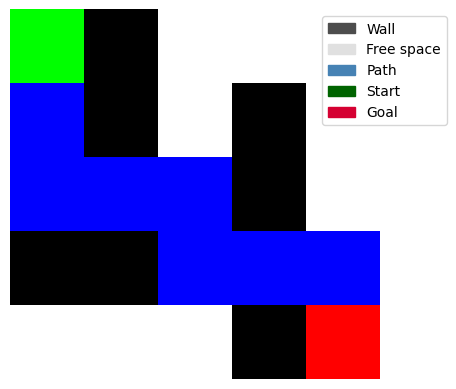

In [9]:
# Example maze
maze = [
    [0, 1, 0, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
]

start = (0, 0)
goal = (4, 4)

# --------------------------
# Step 1: Find path using standard Manhattan heuristic
path = astar(maze, start, goal, manhattan_heuristic)

# Step 2: Calculate path cost
path_cost = len(path) - 1  # each move costs 1
# optimal_cost = len(path) - 1 

# Step 3: Since Manhattan is admissible, this path is optimal
is_optimal = True


# Step 4: Print results
print("Path found:", path)
print("Cost of path:", path_cost)
print("Optimal:", is_optimal)

# Step 5: Visualize the path
visualize_maze(maze, path, start, goal)



Scaled-heuristic

In [10]:
def manhattan_scaled(current, goal):
    return 1.5 * (abs(current[0] - goal[0]) + abs(current[1] - goal[1]))


Scaled Manhattan Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Cost of path: 8
Optimal: True


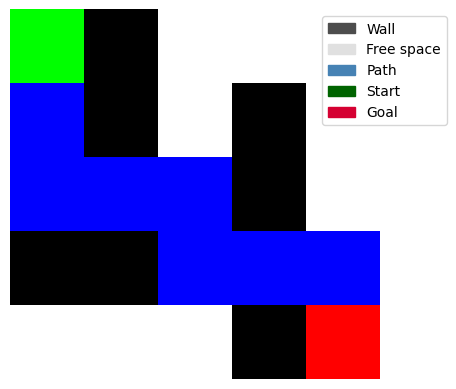

In [11]:
# Step 1: Find optimal path using standard Manhattan heuristic
optimal_path = astar(maze, start, goal, manhattan_heuristic)
optimal_cost = len(optimal_path) - 1  # store the optimal cost

# Step 2: Find path using scaled Manhattan heuristic (1.5 * Manhattan)
path_scaled = astar(maze, start, goal, manhattan_scaled)

# Step 3: Calculate path cost
cost_scaled = len(path_scaled) - 1

# Step 4: Check if the path is optimal
is_optimal_scaled = (cost_scaled == optimal_cost)

# Step 5: Print results
print("Scaled Manhattan Path found:", path_scaled)
print("Cost of path:", cost_scaled)
print("Optimal:", is_optimal_scaled)

# Step 6: Visualize the path
visualize_maze(maze, path_scaled, start, goal)


CASE-2 ::Violating Consistency

In [12]:
def inconsistent_heuristic(current, goal):
    if current == (2,2) and goal == (2,3):
        return 0
    return abs(current[0] - goal[0]) + abs(current[1] - goal[1])


Inconsistent Heuristic Path found: [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4)]
Cost of path: 8
Optimal: True


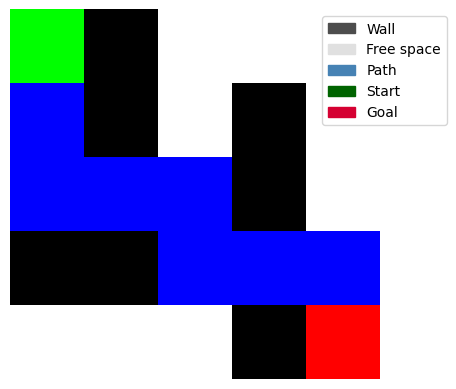

In [13]:
# Run A* with inconsistent heuristic
path_inconsistent = astar(maze, start, goal, inconsistent_heuristic)

# Calculate path cost
cost_inconsistent = len(path_inconsistent) - 1

# Check if path is optimal (compare with optimal_cost from Manhattan case)
is_optimal_inconsistent = (cost_inconsistent == optimal_cost)

# Print results
print("Inconsistent Heuristic Path found:", path_inconsistent)
print("Cost of path:", cost_inconsistent)
print("Optimal:", is_optimal_inconsistent)

# Visualize the path
visualize_maze(maze, path_inconsistent, start, goal)
